In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas_plink import read_plink1_bin

In [2]:
def import_file(path):
    for file_num in range(1,23):
        file_name = path+str(file_num)+'.info'
        with open(file_name,'r') as file:
            for i, line in enumerate(file):
                line = line.replace('\n','')
                if i == 0:
                    chr_num = line.replace('chr', '')
                elif i == 4:
                    sample = line.split()[0]
                elif i == 17:
                    variant_all_qc,sample_qc = line.split()[0:4:3]
                elif i == 16:
                    variant_gwas_qc = line.split()[0]
                elif i == 3:
                    variant = line.split()[0]
                elif i == 7:
                    missing_genotype = line.split()[0]
                elif i == 8:
                    MAF = line.split()[0]
                elif i == 9:
                    prune = line.split()[4]
            if(file_num ==1):
                info = np.array([chr_num, sample,sample_qc,variant,variant_gwas_qc,variant_all_qc,missing_genotype,MAF,prune]).astype(int)
            else:
                info = np.append(info,np.array([chr_num, sample,sample_qc,variant,variant_gwas_qc,variant_all_qc,missing_genotype,MAF,prune]).astype(int), axis=0)

        file.close()

    return(info)

In [3]:
## plot individual
def plot_sample(df, title,filename=' ', savepic=False):
    plt.rcParams['figure.figsize'] = [16, 8]
    x = np.arange(1,23)  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, df['sample'], width, label='sample(before qc)', color = 'lightgrey')
    rects2 = ax.bar(x + width/2, df.sample_qc, width, label='sample_qc', color = 'deepskyblue')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('number of individuals', fontsize=15)
    ax.set_xlabel('chr', fontsize = 15)
    ax.legend(loc='lower right', fontsize=13)
    ax.set_title(title, fontsize=17)
    
    plt.text(0.35,df['sample'][1],df['sample'][1], fontsize = 13, color = 'blue')
    for i in range(22):
        plt.text(i+0.75,df.sample_qc[i],df.sample_qc[i], fontsize = 13)

    fig.tight_layout()
    plt.xticks(df.chr) 
    if savepic != False:
        plt.savefig(filename+'.pdf')
        plt.savefig(filename+'.png')
    
    plt.show()

In [4]:
## plot variants
def plot_variants(df, title,filename=' ', savepic=False):
    plt.rcParams['figure.figsize'] = [20, 8]
    x = np.arange(1,23)  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.3 , df.variants, width, label='variant (before qc)', color = 'lightgrey')
    rects2 = ax.bar(x , df.missing_genotype, width, label='missing_genotype', color = 'cornflowerblue')
    rects3 = ax.bar(x , df.MAF, width, label='MAF',bottom=df.missing_genotype, color = 'lightblue')
    #rects4 = ax.bar(x , df.Prune, width, label='Pruned variants',bottom=df.missing_genotype+df.MAF, color = 'steelblue')
    rects5 = ax.bar(x + 0.3, df.variant_gwas_qc, width, label='variant after gwas qc', color = 'plum')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylim(0, max(df.variants)*1.05)
    ax.set_ylabel('number of variants', fontsize=15)
    ax.set_xlabel('chr', fontsize = 15)
    ax.set_title(title, fontsize=17)
    ax.legend(loc='upper right')

    for i in range(22):
            plt.text(i+0.9,df.variant_gwas_qc[i],df.variant_gwas_qc[i], fontsize = 12, color='maroon')
            plt.text(i+0.2,df.variants[i],df.variants[i]+9000, fontsize = 13, color='blue')
    fig.tight_layout()
    plt.xticks(df.chr) 
    if savepic != False:
        plt.savefig(filename+'.pdf')
        plt.savefig(filename+'.png')
    plt.show()


In [5]:
qc=import_file('/gpfs/commons/home/tlin/output/others/qc/chr')
header =['chr','sample','sample_qc','variants','variant_gwas_qc','variant_all_qc','missing_genotype','MAF','Prune']

qc = pd.DataFrame(np.reshape(qc, [22,9]), columns = header)
qc.to_csv('/gpfs/commons/home/tlin/output/others/qc/qc_result.tsv', sep = '\t', index = False)
qc

,chr,sample,sample_qc,variants,variant_gwas_qc,variant_all_qc,missing_genotype,MAF,Prune
0,1,16906,13407,4864654,811877,89174,404243,3648534,811877
1,2,16906,15210,5126368,882416,93931,321403,3922549,882416
2,3,16906,15423,4228846,752649,78802,262142,3214055,752649
3,4,16906,15773,4141488,765474,77942,228962,3147052,765474
4,5,16906,15381,3843020,677362,71867,221599,2944059,677362
5,6,16906,15807,3660481,688582,69771,214684,2757215,688582
6,7,16906,15001,3488624,616851,66324,244914,2626859,616851
7,8,16906,15598,3273277,579857,60047,187147,2506273,579857
8,9,16906,13619,2709431,459020,53734,223872,2026539,459020
9,10,16906,15172,2950202,530146,57794,204378,2215678,530146


,chr,sample,sample_qc,variants,variant_gwas_qc,variant_all_qc,missing_genotype,MAF,Prune
0,1,16906,13407,4864654,811877,89174,404243,3648534,811877
1,2,16906,15210,5126368,882416,93931,321403,3922549,882416
2,3,16906,15423,4228846,752649,78802,262142,3214055,752649
3,4,16906,15773,4141488,765474,77942,228962,3147052,765474
4,5,16906,15381,3843020,677362,71867,221599,2944059,677362
5,6,16906,15807,3660481,688582,69771,214684,2757215,688582
6,7,16906,15001,3488624,616851,66324,244914,2626859,616851
7,8,16906,15598,3273277,579857,60047,187147,2506273,579857
8,9,16906,13619,2709431,459020,53734,223872,2026539,459020
9,10,16906,15172,2950202,530146,57794,204378,2215678,530146


In [45]:
qc


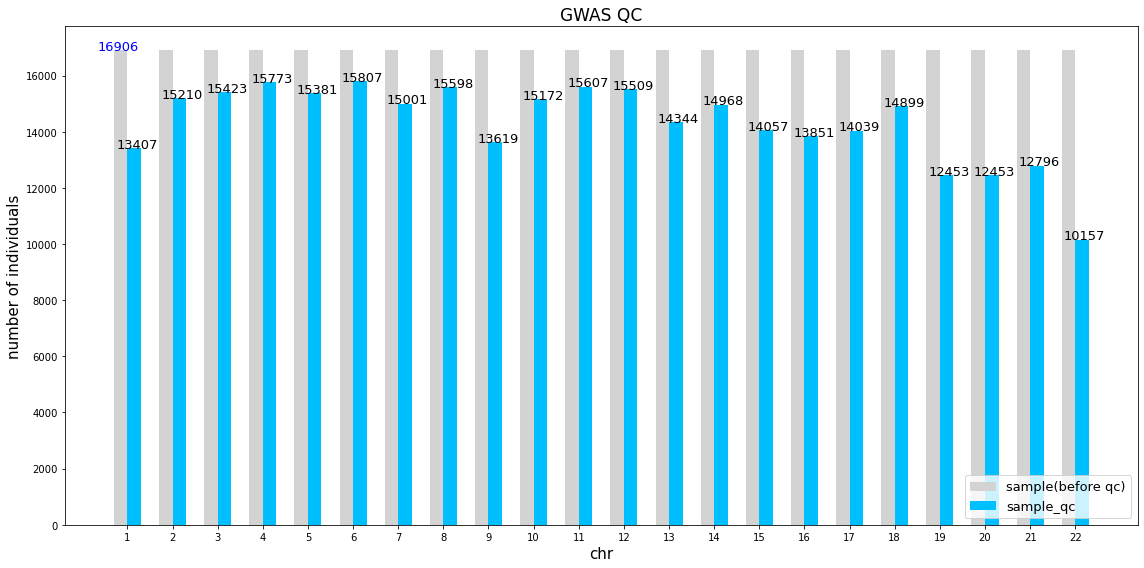

In [113]:
plot_sample(qc, "GWAS QC", filename='/gpfs/commons/home/tlin/pic/qc_target_sample',savepic=True )

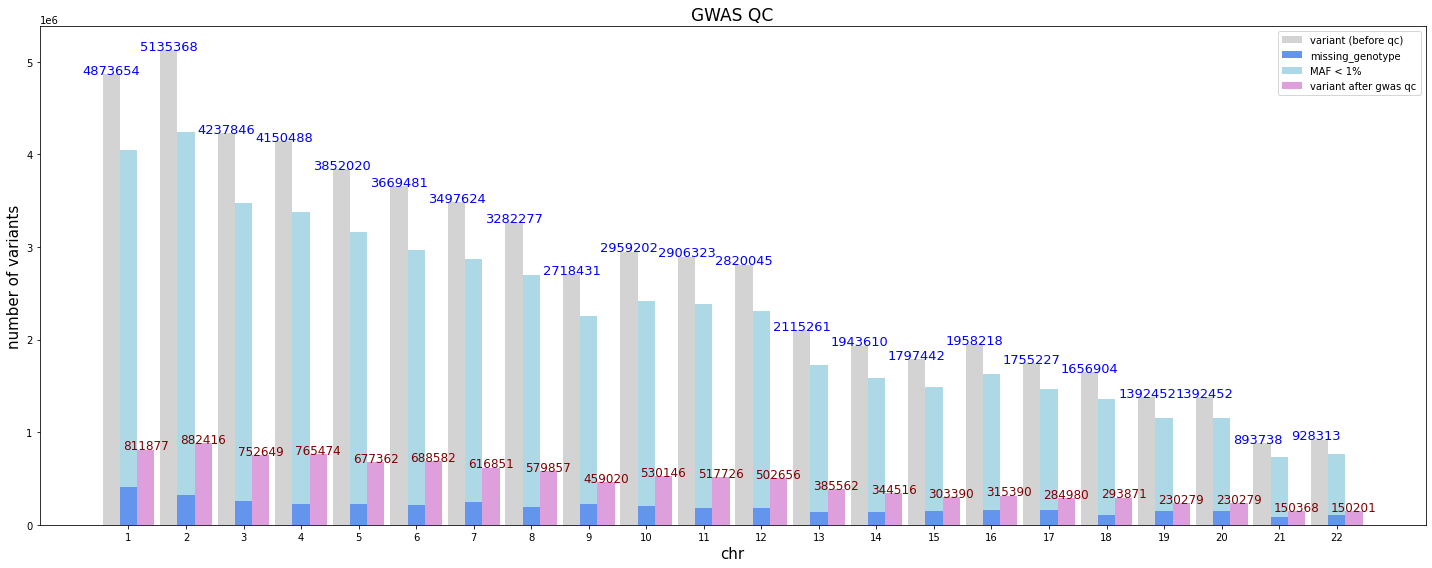

In [114]:
plot_variants(qc, "GWAS QC", filename='/gpfs/commons/home/tlin/pic/qc_target_variants',savepic=True)

In [7]:
maf_01 = import_file('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/compact_filtered_vcf_16906/plink_biallelic/qc_maf_0.1/chr')
maf_01 = pd.DataFrame(np.reshape(maf_01, [22,9]), columns = header)
maf_01.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/compact_filtered_vcf_16906/plink_biallelic/qc_maf_0.1/qc_result.tsv', sep = '\t', index = False)

In [8]:
maf_01

,chr,sample,sample_qc,variants,variant_gwas_qc,variant_all_qc,missing_genotype,MAF,Prune
0,1,16906,13407,4864654,1804045,564595,404243,2656366,1804045
1,2,16906,15210,5126368,1946782,600513,321403,2858183,1946782
2,3,16906,15423,4228846,1638003,500596,262142,2328701,1638003
3,4,16906,15773,4141488,1650180,493972,228962,2262346,1650180
4,5,16906,15381,3843020,1505477,459309,221599,2115944,1505477
5,6,16906,15807,3660481,1461143,435318,214684,1984654,1461143
6,7,16906,15001,3488624,1347676,413079,244914,1896034,1347676
7,8,16906,15598,3273277,1268078,383977,187147,1818052,1268078
8,9,16906,13619,2709431,1009127,314197,223872,1476432,1009127
9,10,16906,15172,2950202,1138765,345101,204378,1607059,1138765


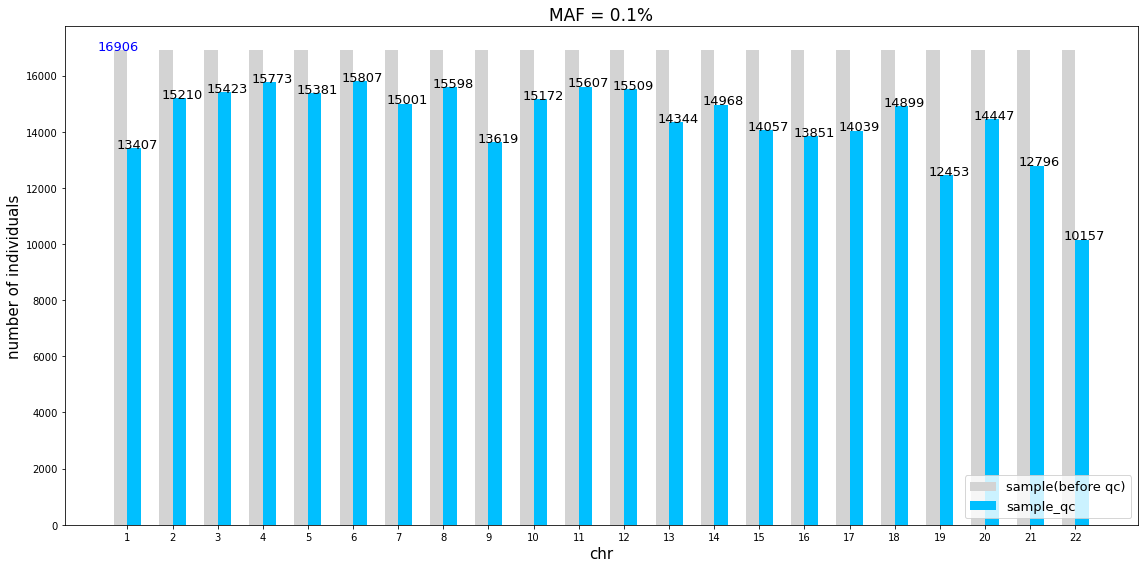

In [9]:
plot_sample(maf_01, 'MAF = 0.1%',filename='/gpfs/commons/home/tlin/pic/qc_target_sample_MAF01',savepic=True)

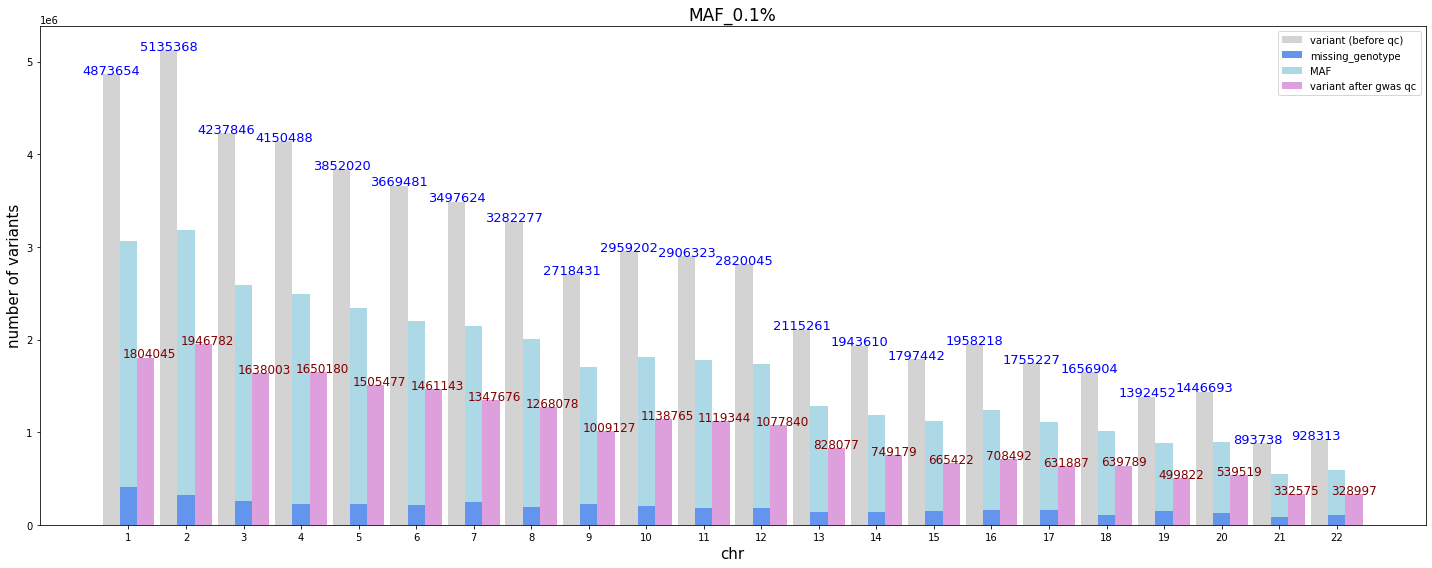

In [40]:
plot_variants(maf_01,'MAF_0.1%',filename='/gpfs/commons/home/tlin/pic/qc_target_variants_MAF01',savepic=True)

In [52]:
def plot_prune(df, title,filename=' ', savepic=False):
    plt.rcParams['figure.figsize'] = [20, 8]
    x = np.arange(1,23)  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.3 , df.variants, width, label='variant (before qc)', color = 'lightgrey')
    rects2 = ax.bar(x - 0.1, df.missing_genotype, width, label='missing_genotype', color = 'cornflowerblue')
    rects3 = ax.bar(x -0.1, df.MAF, width, label='MAF',bottom=df.missing_genotype, color = 'lightblue')
    rects4 = ax.bar(x - 0.1, df.Prune, width, label='Pruned variants',bottom=df.missing_genotype+df.MAF, color = 'steelblue')
    rects5 = ax.bar(x + 0.1, df.variant_gwas_qc, width, label='variant after gwas qc', color = 'lightpink')
    rects6 = ax.bar(x + 0.3, df.variant_all_qc, width, label='variant after all qc', color = 'plum')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylim(0, max(df.variants)*1.05)
    ax.set_ylabel('number of variants', fontsize=15)
    ax.set_xlabel('chr', fontsize = 15)
    ax.set_title(title, fontsize=17)
    ax.legend(loc='upper right')

    for i in range(22):
            plt.text(i+0.9,df.variant_all_qc[i],df.variant_all_qc[i], fontsize = 12, color='red')
            plt.text(i+0.7,df.variant_gwas_qc[i],df.variant_gwas_qc[i], fontsize = 12, color='maroon')
            plt.text(i+0.2,df.variants[i],df.variants[i]+15000, fontsize = 12, color='black')
    fig.tight_layout()
    plt.xticks(df.chr) 
    if savepic != False:
        plt.savefig(filename+'.pdf')
        plt.savefig(filename+'.png')
    plt.show()

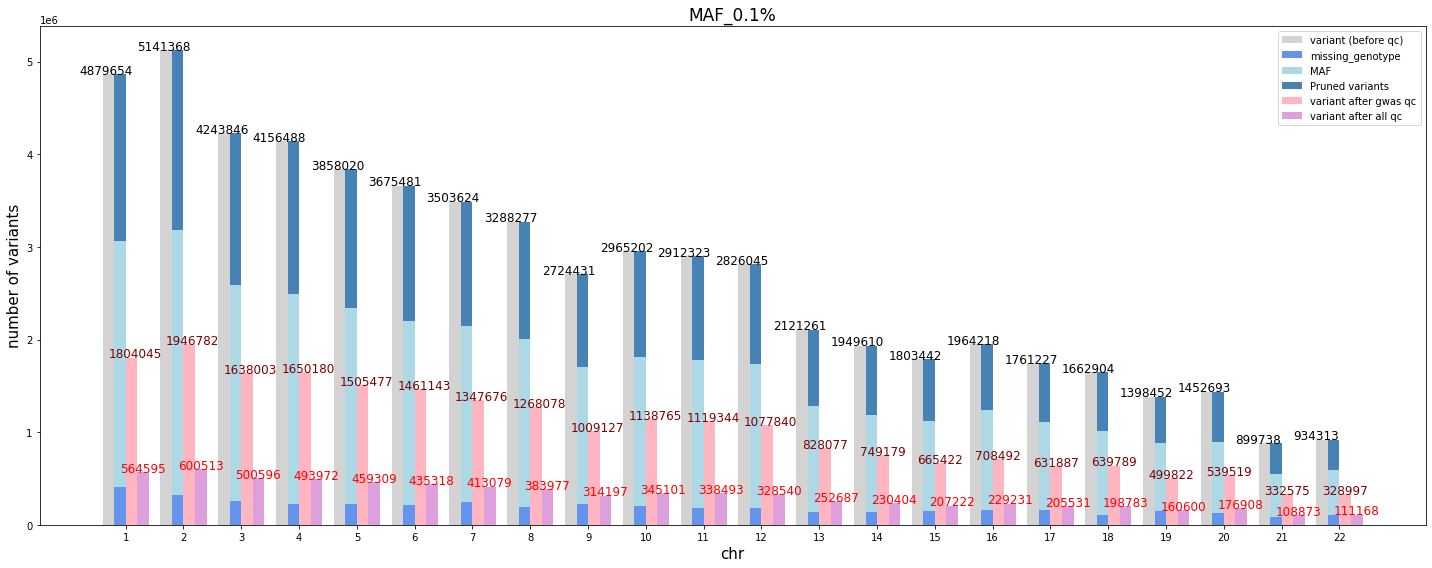

In [55]:
plot_prune(maf_01,'MAF_0.1%',filename='/gpfs/commons/home/tlin/pic/qc_target_variants_MAF01_prune',savepic=True)

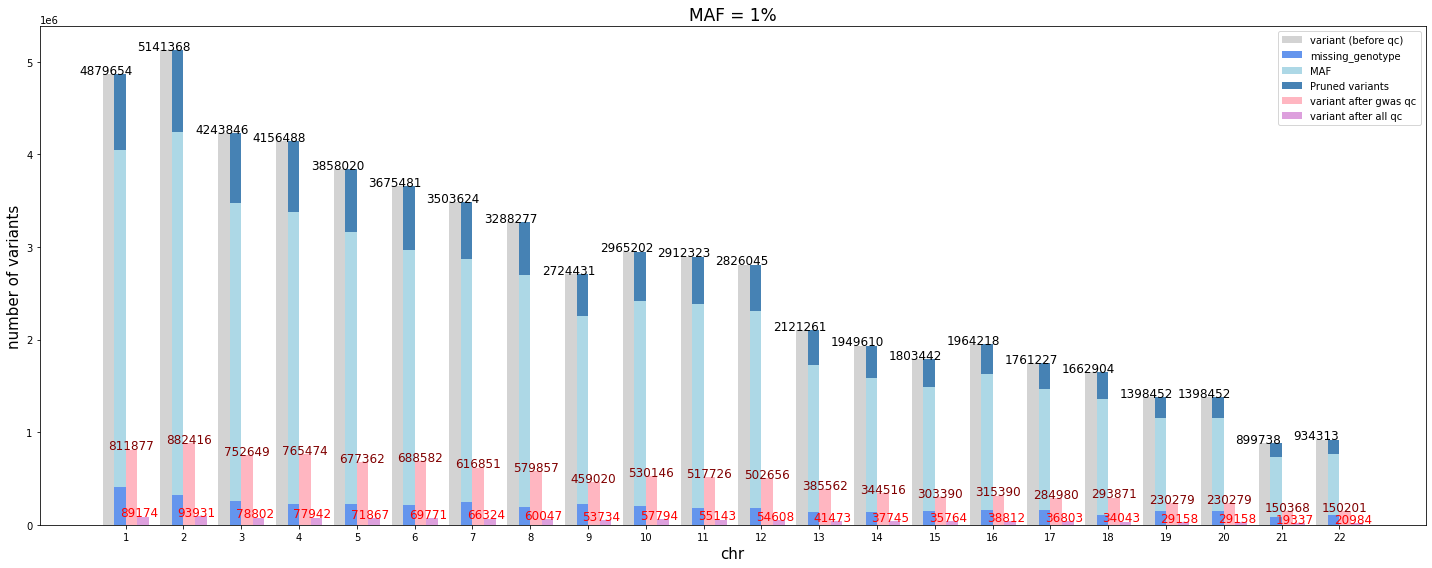

In [56]:
plot_prune(qc,'MAF = 1%',filename='/gpfs/commons/home/tlin/pic/qc_target_variants_prune',savepic=True)

## test new ADSP file

In [ ]:

#from pandas_plink import read_plink1_bin
path='/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/17K_final/annotated_filtered_hg37/plink'
beforeqc = read_plink1_bin(path+"ADSP_annotated_fixed.bed", path+"ADSP_annotated_fixed.bim", "ADSP_annotated_fixed.fam", verbose=False)




